# The Network

For this one, we'll use the networkx package to visualize network data.

https://networkx.github.io/

In this notebook, we'll do some simple things with graphs!

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# You will need to install 'networkx'
import networkx as nx

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_circles

In [2]:
# small demo of networkx; plotting graphs with it
G = nx.Graph()

G.add_node('The Shire')
G.add_node('Mordor')
G.add_node('That place with\n the elves')

G.add_edge('The Shire', 'That place with\n the elves')
G.add_edge('That place with\n the elves', 'Mordor')

In [30]:
# Getting an adjacency matrix from the graph object

print "Node set: ", G.nodes()
print nx.adjacency_matrix(G).toarray()

Node set:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[[0 1 1 ..., 1 1 1]
 [1 0 1 ..., 1 1 1]
 [1 1 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 1 1]
 [1 1 1 ..., 1 0 1]
 [1 1 1 ..., 1 1 0]]


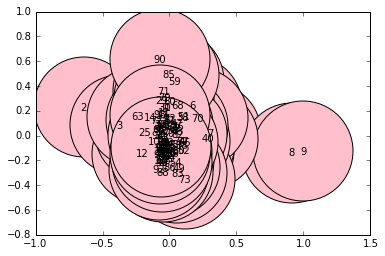

In [35]:
# plotting a graph

def nice_graph_plot(G, node_size=1000, edge_width=2, font_size=10, layout="spectral"):
    if layout == "spectral":
        node_position = nx.spectral_layout(G)
    elif layout == "random":
        node_position = nx.spring_layout(G)
    else:
        print "No valid layout provided"
    
    nx.draw_networkx_nodes(G, node_position, 
                           node_size=node_size, alpha=1, node_color='pink')
    nx.draw_networkx_edges(G, node_position, 
                           width=edge_width, alpha=.8, edge_color='black')
    nx.draw_networkx_labels(G, node_position, 
                            font_size=font_size, font_family='sans-serif')
    
    #plt.figure(figsize=(1,1))
    plt.show()
    
nice_graph_plot(G, 10000)
nice_graph_plot(G, 10000, layout="random")

# Graphs from an adjacency matrix

Write a function that makes a networkx graph object from an adjacency matrix.

Assume that the adjacency matrix is for an undirected graph; that is, the matrix is symmetric.

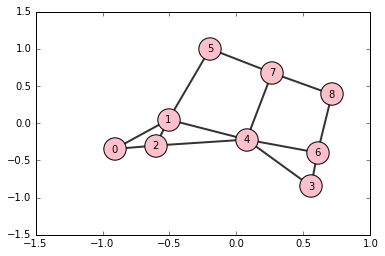

In [64]:
# a simple test adjacency matrix
A = np.array([[0, 1, 1], 
              [1, 0, 0],
              [1, 0, 0]])

# a not as simple adjacency matrix
B = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 1, 1, 0, 0, 0],
              [1, 1, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 1, 0, 0],
              [0, 1, 1, 1, 0, 0, 1, 1, 0],
              [0, 1, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 1, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 1, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 1, 1, 0]])



nice_graph_plot(nx.Graph(B), 500)


# Degree from an adjecency matrix

Assume again you have an undirected graph's adjacency matrix.

Write a function to compute the degree of each node from a matrix.

Use the make_degree_dist_histogram to plot the degree distribution

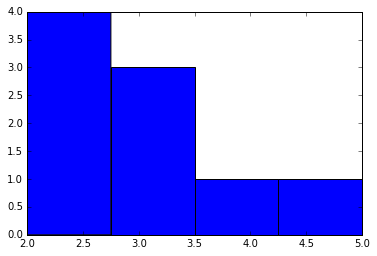

In [43]:
def make_degree_dist_histogram(degrees, title=""):
    plt.hist(degrees, np.ptp(degrees) + 1)
    plt.title(title)
    plt.show()

def compute_degree(mat):
    return(mat.sum(axis=0))

make_degree_dist_histogram(compute_degree(B))


# Random graphs

networkx has a few random graph generators, lets try them out!

Look at the random graphs here:
https://networkx.github.io/documentation/latest/reference/generators.html

Some interesting ones:

1. barbell_graph is a cute fixed one
2. erdos-renyi graphs https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model Here, we draw edges at random between edges, giving a certain degree distribution. Does this graph look like anything real?
3. watts_strogatz_graph https://en.wikipedia.org/wiki/Watts_and_Strogatz_model This graph makes 'small world' graphs.
4. barabasi_albert_graph https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model This makes graphs with power law distributions, which is something we observe a lot in real social networks (e.g. consider the graph of Twitter users)

# Closeness

Implement a measure of closeness. For example: the average length of paths to all other nodes in the network.

Hint: the adjacency matrix for two steps is given by the adjacency matrix squared, e.g.:

np.dot(A, A)

This generalizes to any number of steps.

Plot closeness distributions for some random graphs.

In [74]:
np.dot(A,A)

def closeness(array):
    for i in range(0, array.shape[0]):
        for j in range(0, array.shape[1]):
            print 

closeness(A)

0
0
0
1
1
1
4
4
4


In [71]:
np.dot(A,A)

array([[2, 0, 0],
       [0, 1, 1],
       [0, 1, 1]])